Epoch 0: Loss=377.5245, m=2.24, c=0.35
Epoch 20: Loss=2.8255, m=3.24, c=0.67
Epoch 40: Loss=2.7106, m=3.22, c=0.81
Epoch 60: Loss=2.6164, m=3.20, c=0.95
Epoch 80: Loss=2.5392, m=3.18, c=1.07
Epoch 100: Loss=2.4759, m=3.17, c=1.18
Epoch 120: Loss=2.4241, m=3.15, c=1.28
Epoch 140: Loss=2.3816, m=3.14, c=1.37
Epoch 160: Loss=2.3468, m=3.13, c=1.46
Epoch 180: Loss=2.3183, m=3.11, c=1.53

Learned Parameters:
Slope (m): 3.10
Intercept (c): 1.59


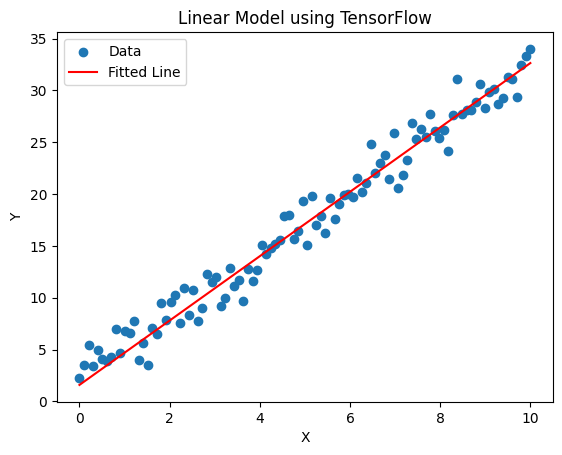

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data for training
# True relation: y = 3x + 2 + noise
X = np.linspace(0, 10, 100)  # input data
Y = 3 * X + 2 + np.random.randn(*X.shape) * 1.5  # output data with noise

# Step 2: Build a linear model y = m*x + c
# TensorFlow Variables (to be learned)
m = tf.Variable(0.0)  # slope initialized randomly
c = tf.Variable(0.0)  # intercept initialized randomly

# Step 3: Define prediction function
def predict(x):
    return m * x + c

# Step 4: Define loss function (Mean Squared Error)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Step 5: Choose optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Step 6: Training loop
epochs = 200
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = predict(X)
        loss = loss_fn(Y, y_pred)
    gradients = tape.gradient(loss, [m, c])
    optimizer.apply_gradients(zip(gradients, [m, c]))

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss={loss.numpy():.4f}, m={m.numpy():.2f}, c={c.numpy():.2f}")

# Step 7: Final results
print("\nLearned Parameters:")
print(f"Slope (m): {m.numpy():.2f}")
print(f"Intercept (c): {c.numpy():.2f}")

# Step 8: Plot results
plt.scatter(X, Y, label="Data")
plt.plot(X, predict(X), color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Model using TensorFlow")
plt.show()
